# **Lab 4 : Linear Regression**<br>

Regression is the process of estimating a model that produces the best fit for the given data. **Linear Regression** is the simplest and most popular among them. A linear regression model is given by y = a<sub>0</sub> + a<sub>1</sub>x, where a<sub>0</sub> and a<sub>1</sub> are the parameters of the regression model. The values of these two parameters should be such that the produced result of (a<sub>0</sub> + a<sub>1</sub>x) should have the least deviation from the actual result. In order to measure how well our model fits the data or whether it deviates from the actual result, we use the least square criterion.

In today's lab, we will be implementing the Linear Regression in python. Note that there might be built-in functions for linear regression in python, but the purpose of this lab is to understand how linear regression actually works, and hence those built-in functions are not allowed. To test our implementation, we will be using the same data that is available in the first example of our class lecture pdf. That way, you can check whether your implementation is working correctly by comparing with the results obtained in that example. Run the following cell to load the known data points:


In [ ]:
theta = [0.698132, 0.959931, 1.134464, 1.570796, 1.919862]
torque = [0.18824, 0.209138, 0.230052, 0.250965, 0.313707]

##Task 1
Assuming that the linear regression model for the given data is defined as Torque = a<sub>0</sub> + a<sub>1</sub>*Theta, write a function that takes the given data as input and returns the regression parameters a<sub>0</sub> and a<sub>1</sub>.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def LinearRegression(theta, torque):
    n = len(theta)
    theta = np.asarray(theta)
    torque = np.asarray(torque)
    Sxx = np.sum(theta**2) - n*(np.mean(theta)**2)
    Sxy = np.sum(theta*torque) - n*np.mean(theta)*np.mean(torque)

    a1 = Sxy/Sxx
    a0 = np.mean(torque) - a1*np.mean(theta)

    return a0, a1

In [ ]:
a0, a1 = LinearRegression(theta, torque)
print(f'a0 = {a0} Nm, a1 = {a1} Nm/rad')

a0 = 0.11768012662481919 Nm, a1 = 0.09608206138700422 Nm/rad


##Task 2
Write another function that takes any arbitrary value as input and applies the regression model to generate the output. 

In [ ]:
def calculate(x):
    a0, a1 = LinearRegression(theta, torque)
    return a0 + x*a1

In [ ]:
x = random.uniform(np.min(theta), np.max(theta))
print(f'theta = {x} radians, torque = {calculate(x)} Nm')

theta = 1.4448496203981256 radians, torque = 0.2565042565469017 Nm


##Task 3
Use the calculate function in a loop to generate a plot of the regression curve. Show the original data points (theta, torque) on the same plot using stem function. Use different colors for the regression curve and the original data points and show a legend. For this task, you are allowed to use various libraries such as matplotlib.

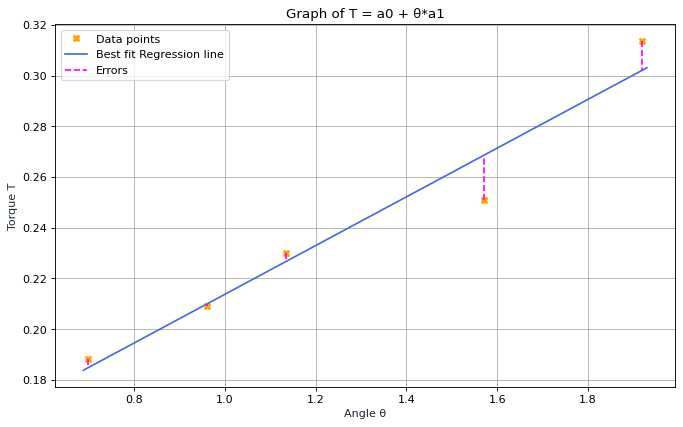

In [ ]:
x_line = np.linspace(np.min(theta) - 0.01, np.max(theta) + 0.01, 100)
y_line = calculate(x_line)

plt.figure(figsize=(10, 6), dpi=80)
plt.title('Graph of T = a0 + θ*a1')
plt.xlabel('Angle θ', color='#1C2833')
plt.ylabel('Torque T', color='#1C2833')
plt.plot(theta, torque, 'X', color = 'orange', label = 'Data points')
plt.plot(x_line, y_line, '-',  label = 'Best fit Regression line', color = 'royalblue')
# plt.stem(theta, torque, use_line_collection = True)
for i in range(len(theta)):
    if i==0:
        plt.plot((theta[i], theta[i]), (torque[i], calculate(theta[i])), '--', color = 'magenta', label = 'Errors')
    else:
        plt.plot((theta[i], theta[i]), (torque[i], calculate(theta[i])), '--', color = 'magenta')
plt.legend(loc='best')
plt.grid()
plt.show()